## Model Quality and Improvements_Project

### 1.Defining the Question
#### a) Specifying the Data Analysis Question
What is your research question? What problem is it that you are trying to solve?
you need to develop a model that predicts whether a patient will be diagnosed with diabetes?
##### b) Defining the Metric for Success
What will convince you that your project has succeeded?
The model needsto have an accuracy score greater than 0.85.
#### c) Understanding the context
The background information surrounding the problem or research question.+
As a data professional working for a pharmaceutical company,
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

#### d) Recording the Experimental Design
The steps you will take from the beginning to the end of this project.

- 2. Read and Load Data
- 3. Data Exploration
- 4. Data Cleaning
- 5. Data Preparation
- 6. Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)
- 7. Model Evaluation
- 8. Hyparameter Tuning
- 9. Findings and Recommendation

#### e) Data Relevance
Is your data relevant to the problem or research question?
The data contains a list of patients with diabetic conditions hence relevant to our analysis and model building.

### 2 Read and load dataset

In [1]:
# we import the libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")#read and load the dataset

#### 3 Data Exploration


In [3]:
#preview the first five records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Previewing the last few records
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#preview the no. of records/ size of records
df.shape

(768, 9)

The dataset has 768 rows and 9 columns.

In [6]:
# Checking the datatypes of df variables(columns)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
list(df)#checking for column headers

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
#check for Index range,data columns and entries in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4. Data Cleaning and Standardization

- We clean the data set by checking for any iconsistent column names, missing data in the dataset and duplicate value.

In [9]:
# we check for the missing values and in our data set
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Checking for duplicates in our dataset
sum(df.duplicated())

0

In [11]:
# Checking if any of the columns are all null
df.isnull().all(1).any()

False

In [12]:
# We check if any of the rows in the dataset are all null
df.isnull().all(1).any()

False

**none of the rows or columns  in the data set are null

In [13]:
df.sample(30)#We sample out any number of the data set.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
55,1,73,50,10,0,23.0,0.248,21,0
581,6,109,60,27,0,25.0,0.206,27,0
715,7,187,50,33,392,33.9,0.826,34,1
54,7,150,66,42,342,34.7,0.718,42,0
112,1,89,76,34,37,31.2,0.192,23,0
708,9,164,78,0,0,32.8,0.148,45,1
445,0,180,78,63,14,59.4,2.420,25,1
84,5,137,108,0,0,48.8,0.227,37,1
51,1,101,50,15,36,24.2,0.526,26,0
141,5,106,82,30,0,39.5,0.286,38,0


In [14]:
# We need to standardize column names and remove whitespaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()
list(df.columns)

['pregnancies',
 'glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age',
 'outcome']

In [15]:
#Lets check for summary statistics for the dataset
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 5 Data Visualization 
- We borrow the Knowledge of Data Visualization to create insights on our dataset and understand the correlations.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


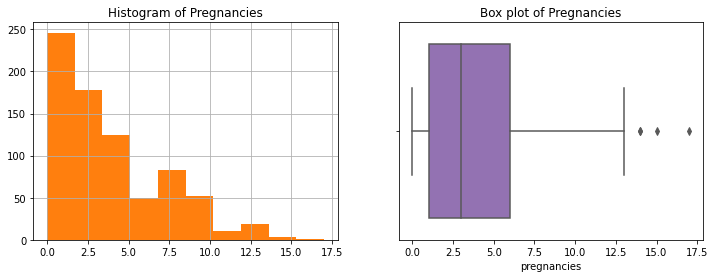

In [16]:
#Lets check for distribution of Pregnancies
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
df.pregnancies.hist(color = '#ff7f0e')
plt.title('Histogram of Pregnancies')

plt.subplot(1, 2, 2)
sns.boxplot(df.pregnancies, color = '#9467bd')
plt.title('Box plot of Pregnancies')
plt.show()

In [17]:
#Lets check the summary statistics of pregnancies
df.pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64

- pregnancies have more outliers above the upperbound of the histogram.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


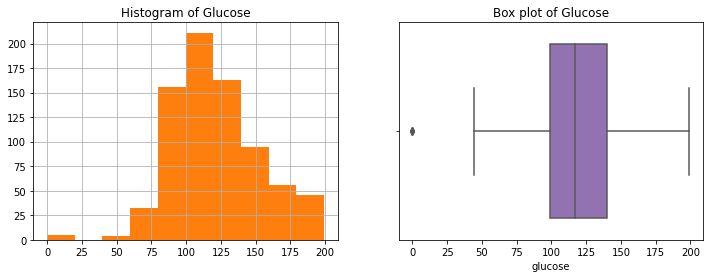

In [18]:
#Glucose Distribution
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
df.glucose.hist(color = '#ff7f0e')
plt.title('Histogram of Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(df.glucose, color = '#9467bd')
plt.title('Box plot of Glucose')

plt.show()

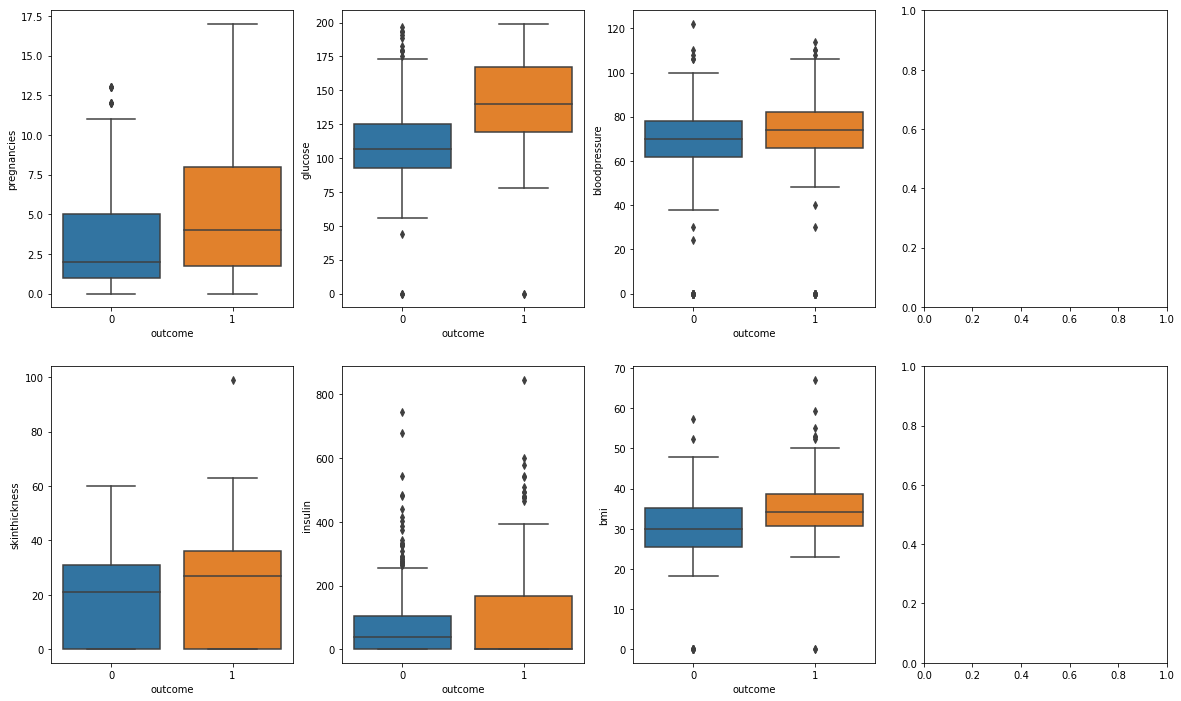

In [19]:
c=[0,1,2]
r=[0,1]
cols_index=0
cols=df.columns[:-1]
fig,axs = plt.subplots(2, 4,figsize=(20,12))
for i in r:
    for j in c:              
        box_plot = sns.boxplot(x="outcome",y=cols[cols_index],data=df,ax=axs[i,j])
        medians = df.groupby(["outcome"])[cols[cols_index]].median()
        vertical_offset = df[cols[cols_index]].median() * 0.05 
        cols_index+=1

- Pregnancies,insulin and skinthickness has outliers skewed to the top and  glucose,bloodpressure bmi has the outliers skewed to both ends.

- BMI is distributed with many outliers above the top bound and a few of them below the lower bound
- Insulin is evenly distributed with the most outliers above the upper bound
- Skinthickness is distributed with the outlier on the upper bound.
- Glucose is distributed with some of the outliers above the upper bound and a few on the lower bound.
- Pregnancies is skewed with many outliers on the top.

### Distribution of the Outcome
we ask the question if most the patients were diabetic?

In [20]:
outcome_group = df.groupby('outcome').size().reset_index(name='Count')
outcome_group

,outcome,Count
0,0,500
1,1,268


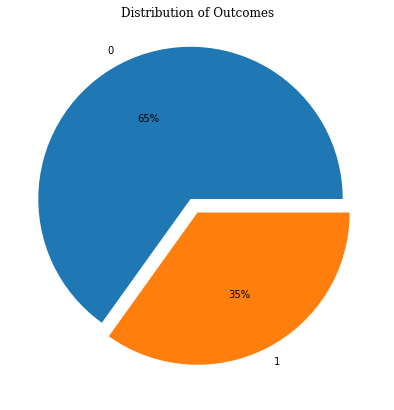

In [21]:
outcome_group = df.groupby('outcome').size().reset_index(name='Count')
Outcome = outcome_group['outcome']
Count = outcome_group['Count']

explode = (0.1, 0)
# Render
plt.figure(figsize=(8, 7))
plt.pie(x=Count, labels = Outcome, explode = explode, autopct = '%.0f%%')

# Tweak & Label
plt.title('Distribution of Outcomes', fontdict= {'fontname': 'Serif', 'fontsize': 12})  

# Display
plt.show()

- We note that most of the patients were not diabetic as per the distribution outcome.
- its essential for us to understand the visualization part before proceeding to the model building.
-

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'pregnancies'),
  Text(1.5, 0, 'glucose'),
  Text(2.5, 0, 'bloodpressure'),
  Text(3.5, 0, 'skinthickness'),
  Text(4.5, 0, 'insulin'),
  Text(5.5, 0, 'bmi'),
  Text(6.5, 0, 'diabetespedigreefunction'),
  Text(7.5, 0, 'age'),
  Text(8.5, 0, 'outcome')])

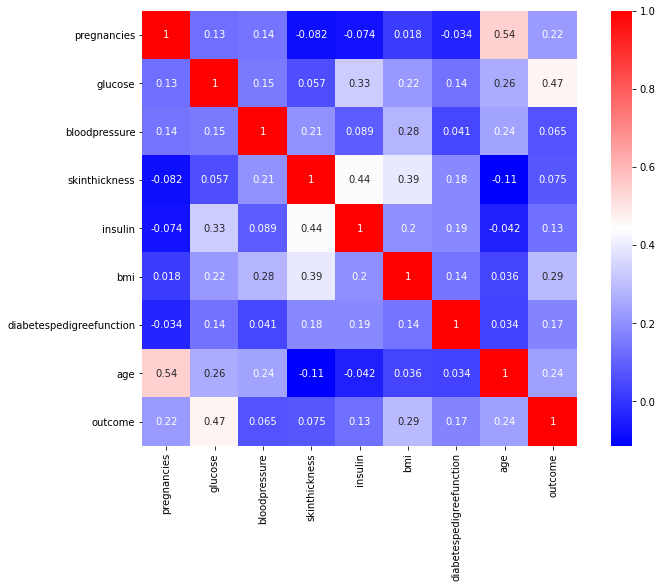

In [22]:
#We need to understand the correlations between variables
correlations=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlations,square=True,annot = True,cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Note:**

    - we need to drop the highly correlated features for our model building.the general practice is to exclude highly correlated features while running regression.
    -Correlation simply means a mutual relationship between two or more things.
    
**Why exclude highly correlated features?**

     - regression is all about learning the weight vector from the training data and using it to make predictions.
     - For the model to be stable enough, the variance should be low. 
     - If the variance of the weights is high, it means that the model is very sensitive to data. 
     - The weights differ largely with training data if the variance is high. 
     - It means that the model might not perform well with test data.

In [23]:
df_1=df.drop(['skinthickness','insulin','diabetespedigreefunction'],axis=1)

In [24]:
df_1.head()

,pregnancies,glucose,bloodpressure,bmi,age,outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,0,137,40,43.1,33,1


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'pregnancies'),
  Text(1.5, 0, 'glucose'),
  Text(2.5, 0, 'bloodpressure'),
  Text(3.5, 0, 'bmi'),
  Text(4.5, 0, 'age'),
  Text(5.5, 0, 'outcome')])

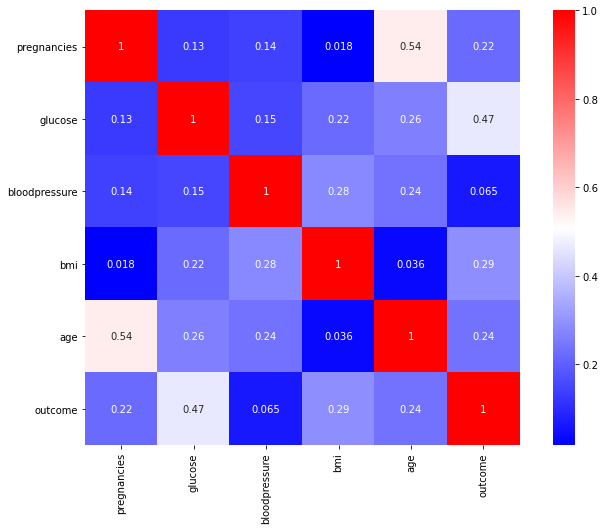

In [25]:
#We need to understand the correlations between variables
correlations=df_1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlations,square=True,annot = True,cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

**it is advised that we keep only one feature in the dataset if two features are highly correlated**

In [26]:
X=df_1.drop('outcome',axis=1)
y=df_1['outcome']

print(X.shape)
print(y.shape)

(768, 5)
(768,)


##### 6. Splitting the Dataset

- We split the dataset into two training dataset and test dataset by using the 80% and 30% rule respectively.


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [28]:
X_train

,pregnancies,glucose,bloodpressure,bmi,age
668,6,98,58,34.0,43
623,0,94,70,43.5,21
537,0,57,60,21.7,67
27,1,97,66,23.2,22
613,6,105,80,32.5,26
...,...,...,...,...,...
419,3,129,64,26.4,28
120,0,162,76,53.2,25
368,3,81,86,27.5,22
48,7,103,66,39.1,31


In [29]:
X_test

,pregnancies,glucose,bloodpressure,bmi,age
93,4,134,72,23.8,60
42,7,106,92,22.7,48
194,8,85,55,24.4,42
130,4,173,70,29.7,33
676,9,156,86,24.8,53
...,...,...,...,...,...
320,4,129,60,27.5,31
113,4,76,62,34.0,25
242,3,139,54,25.6,22
57,0,100,88,46.8,31


### 7.Building a logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [31]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_log_pred=logreg.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy Score')
print(metrics.accuracy_score(y_test,y_log_pred))

Accuracy Score
0.7272727272727273


**Confussion Matrix**

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_log_pred))

[[130  14]
 [ 49  38]]


In [35]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       144
           1       0.73      0.44      0.55        87

    accuracy                           0.73       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.73      0.73      0.71       231



The accuracy_score of our model 0.73

**Checking the performance of our model by using ROC_Receiver Operating Characteristic Curve**

In [36]:
#ROC_CURVE

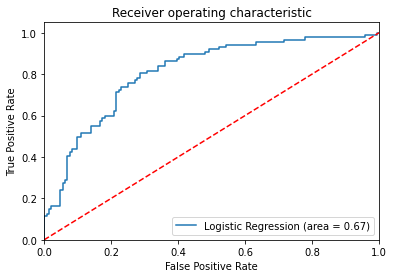

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
#ROC_Accuracy_Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_log_pred)

0.66977969348659

### Predictive Modeling with Hyperparammeter Tuning
### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
df_1_tree = DecisionTreeClassifier()
df_1_tree

DecisionTreeClassifier()

In [40]:
df_1_tree.fit(X_train,y_train)  

DecisionTreeClassifier()

In [41]:
y_predict = df_1_tree.predict(X_test)

In [42]:
from sklearn import metrics
print("DecisionTrees's Accuracy on Train set: ", metrics.accuracy_score(y_train, df_1_tree.predict(X_train)))
print("DecisionTrees's Accuracy on Test set : ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy on Train set:  1.0
DecisionTrees's Accuracy on Test set :  0.696969696969697


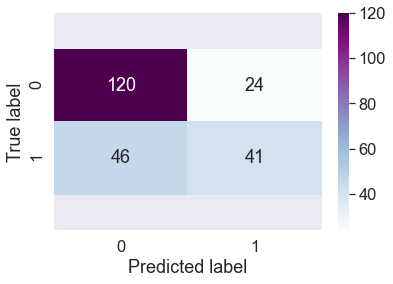

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [44]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       144
           1       0.63      0.47      0.54        87

    accuracy                           0.70       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.69      0.70      0.69       231



#### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'max_depth': (2,4,6,8,10),
             'criterion': ('gini','entropy'),
             'min_samples_leaf' : (1,2,3,4,5),
             'max_leaf_nodes' : (3,4,5,6,7,8,9,10)
        
             }

In [47]:
gridsearch_tree = GridSearchCV(estimator = df_1_tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                        n_jobs = -1
                          )

In [48]:
gridsearch_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 4, 6, 8, 10),
                         'max_leaf_nodes': (3, 4, 5, 6, 7, 8, 9, 10),
                         'min_samples_leaf': (1, 2, 3, 4, 5)},
             scoring='accuracy')

In [49]:
print("tuned  decision tree perameter: {}" .format(gridsearch_tree.best_params_))
print("best score: {}" .format(gridsearch_tree.best_score_))

tuned  decision tree perameter: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}
best score: 0.7820055904961565


In [50]:
print("best estimator: {}" .format(gridsearch_tree.best_estimator_))

best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       min_samples_leaf=3)


In [51]:
df_1_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_predict = df_1_tree.predict(X_test)

In [53]:
from sklearn import metrics
print(" Tuned DecisionTrees's Accuracy on Train set: ", metrics.accuracy_score(y_train,df_1_tree.predict(X_train)))
print("Tuned DecisionTrees's Accuracy on Test set : ", metrics.accuracy_score(y_test, y_predict))

 Tuned DecisionTrees's Accuracy on Train set:  1.0
Tuned DecisionTrees's Accuracy on Test set :  0.696969696969697


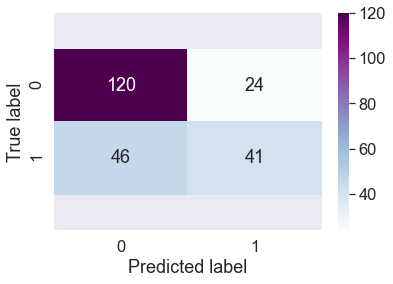

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [55]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       144
           1       0.63      0.47      0.54        87

    accuracy                           0.70       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.69      0.70      0.69       231



## Random Forest

In [57]:
#Building the model using Random Forest
# Declare features and target variables
# import random forest classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier
X_features = df_1.drop(['outcome'], axis=1)
y_target = df_1['outcome']
#define the model
model = RandomForestClassifier(random_state=12345, n_estimators=10)

 #Train the model
model.fit(X_features, y_target)
#Print  model accuracy
print(model.score(X_features, y_target)) 

0.9830729166666666


## Model_Evaluation and Hyperparameter tunning

In [58]:
#Import train_test_split from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
# Split the dataset
from sklearn.model_selection import train_test_split
df_1train, df_1valid = train_test_split(df_1, test_size=0.3, random_state=21)

# Declare features and target variables
X_features_train1 = df_1train.drop(['outcome'], axis=1)
y_target_train1 = df_1train['outcome']
X_features_valid1 = df_1valid.drop(['outcome'], axis=1)
y_target_valid1 = df_1valid['outcome']

In [59]:
#we create a loop for our model
for estimator in range(1, 10):
    #create the model
        model_1 = RandomForestClassifier(random_state=12345, n_estimators=estimator) 
        #Train our Model
        model_1.fit(X_features_train1, y_target_train1)

        print("n_estimators =", estimator, ": ", end='')
        #get the accuracy score
        print(model_1.score(X_features_valid1, y_target_valid1)) 

n_estimators = 1 : 0.670995670995671
n_estimators = 2 : 0.670995670995671
n_estimators = 3 : 0.6796536796536796
n_estimators = 4 : 0.670995670995671
n_estimators = 5 : 0.6926406926406926
n_estimators = 6 : 0.696969696969697
n_estimators = 7 : 0.70995670995671
n_estimators = 8 : 0.7142857142857143
n_estimators = 9 : 0.7316017316017316


### Recommendation and Findings

- Random forest performs well with the accuracy of 0.98, its the best model to deploy to production. Therefore the company should adopt the model.
- Random forest (RF) is one of the most powerful ensemble classifiers often used in machine learning applications. It has been found successful on many benchmarked data. However, the performance of an RF model is highly affected by the calibration of the model parameters. It requires optimization of two parameters—(i) size of RF and (ii) number of features. RF is based on the principle of bagging and random selection of relevant features.
- Dtree has an accuracy of 0.68 and after evaluation and hyperparameter tuning it gained a score of 0.70
- Logistic Regression accuracy of 0.73 after confusion matrix and ROC it dropped to 0.66. The data had more correlated features which we had to drop because regression is all about learning the weight vector from the training data and using it to make predictions.
- For the model to be stable enough, the variance should be low. 
- If the variance of the weights is high, it means that the model is very sensitive to data. 
- The weights differ largely with training data if the variance is high. 
- It means that the model might not perform well with test data.